In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Data Science\Data Sets\Tourist_Travel_Europe.csv")

In [4]:
df.head()

,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit
0,1,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer
1,2,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter
2,3,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter
3,4,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer
4,5,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tourist_ID            1000 non-null   int64 
 1   Country_Visited       1000 non-null   object
 2   City_Visited          1000 non-null   object
 3   Mode_of_Travel        1000 non-null   object
 4   Travel_Duration_Days  1000 non-null   int64 
 5   Number_of_Companions  1000 non-null   int64 
 6   Total_Travel_Cost     1000 non-null   int64 
 7   Accommodation_Type    1000 non-null   object
 8   Main_Purpose          1000 non-null   object
 9   Season_of_Visit       1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [6]:
df.describe()

,Tourist_ID,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.820000,2.983000,2600.376000
std,288.819436,5.489785,1.428549,1393.394815
min,1.000000,2.000000,1.000000,201.000000
25%,250.750000,6.000000,2.000000,1352.250000
50%,500.500000,11.000000,3.000000,2600.500000
75%,750.250000,16.000000,4.000000,3849.500000
max,1000.000000,20.000000,5.000000,4999.000000


In [7]:
df.describe(include = "object")

,Country_Visited,City_Visited,Mode_of_Travel,Accommodation_Type,Main_Purpose,Season_of_Visit
count,1000,1000,1000,1000,1000,1000
unique,10,30,5,4,3,4
top,Greece,Lisbon,Flight,Hotel,Family Visit,Winter
freq,112,44,239,259,346,265


In [8]:
df.isnull().sum()

Tourist_ID              0
Country_Visited         0
City_Visited            0
Mode_of_Travel          0
Travel_Duration_Days    0
Number_of_Companions    0
Total_Travel_Cost       0
Accommodation_Type      0
Main_Purpose            0
Season_of_Visit         0
dtype: int64

In [10]:
df.duplicated().sum()

0

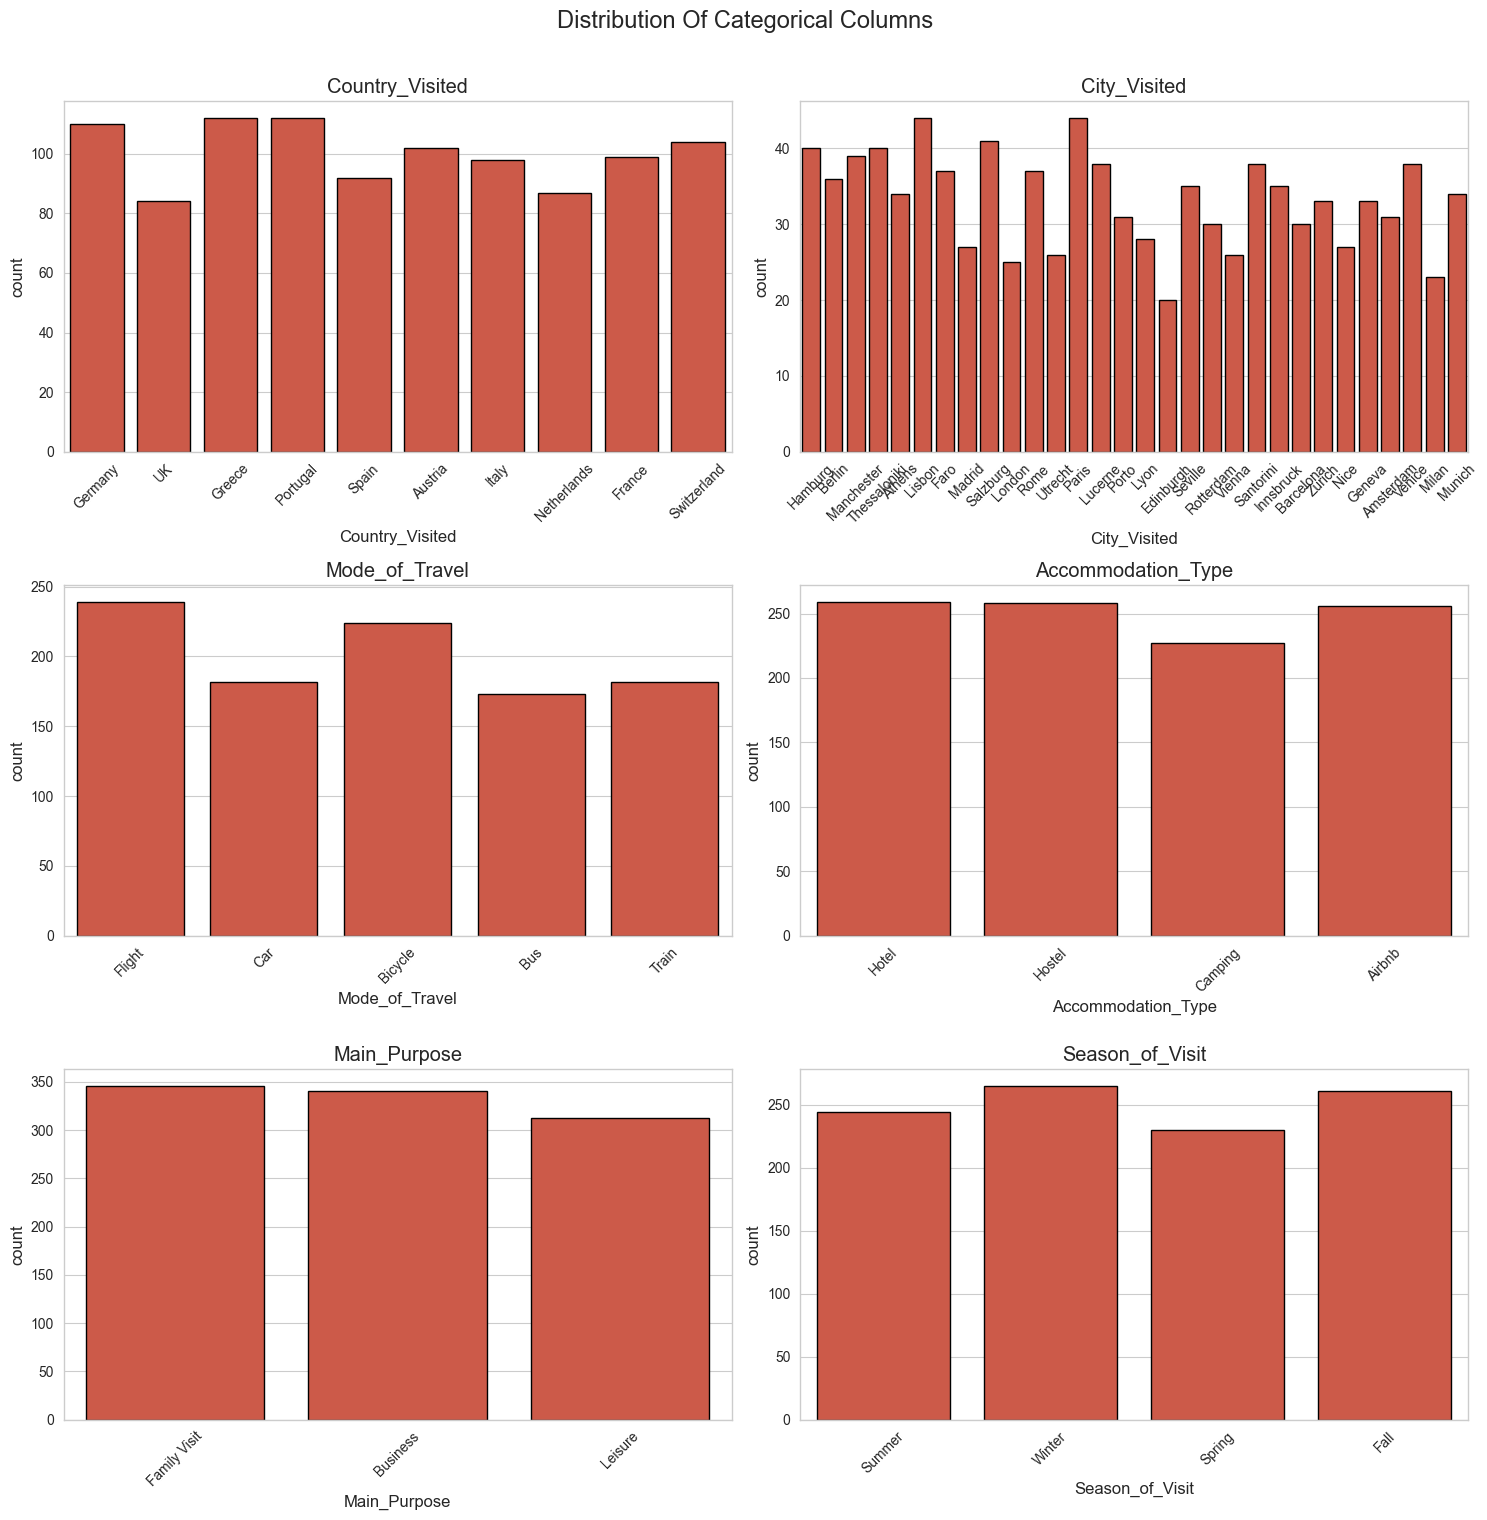

In [26]:
cat = df.select_dtypes(include = "object").columns
l = len(cat)
    
plt.figure( figsize = (15,15))
   
for index , col in enumerate(cat, 1):
    plt.subplot(3,2,index)
    sns.countplot(x = df[col], linewidth = 1, edgecolor = "k")    
    plt.title(col)
    plt.xticks( rotation = 45)
    
plt.suptitle( "Distribution Of Categorical Columns", size = 17, y = 1.01)
plt.tight_layout()
plt.show()

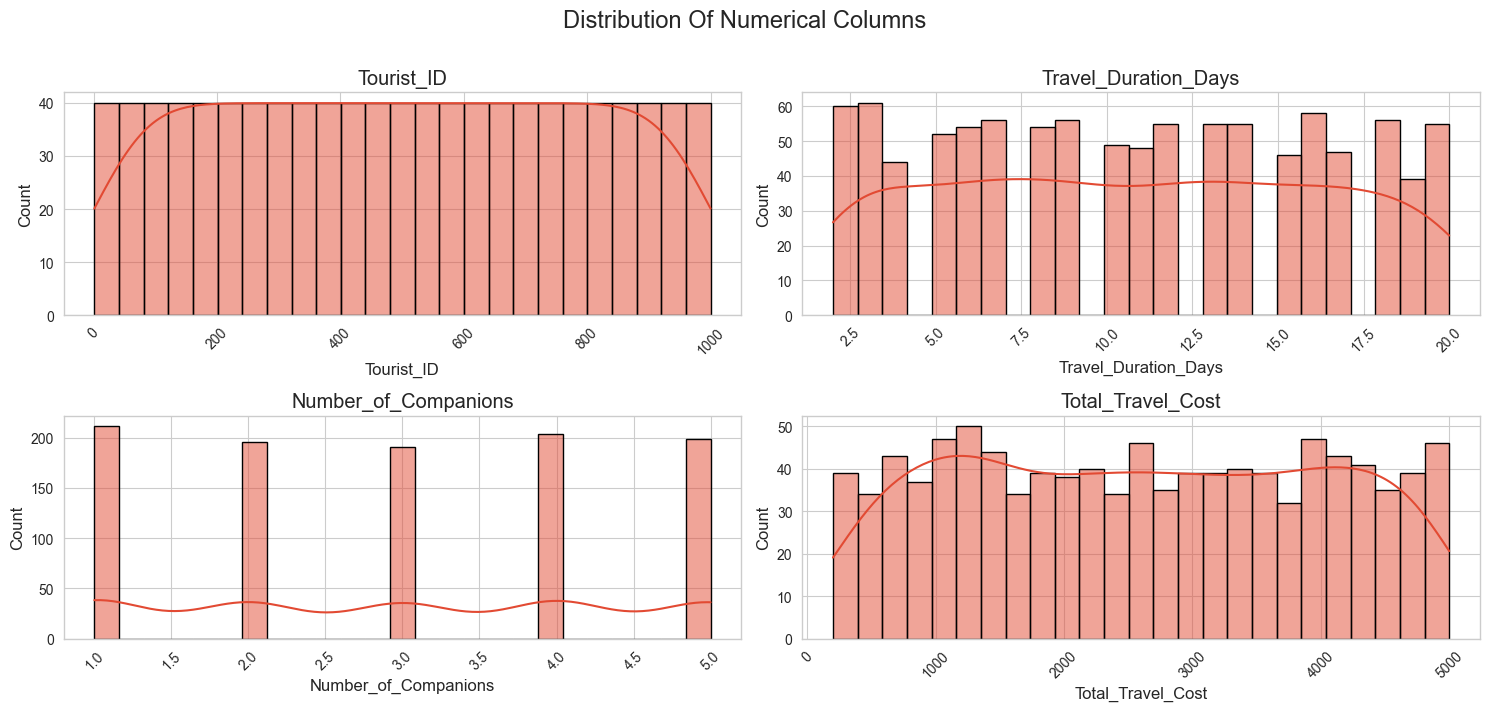

In [31]:
num = df.select_dtypes(exclude = "object").columns
l = len(num)
    
plt.figure( figsize = (15,7))
   
for index , col in enumerate(num, 1):
    plt.subplot(2,2,index)
    sns.histplot(x = df[col], linewidth = 1, edgecolor = "k", bins = 25 , kde = True)    
    plt.title(col)
    plt.xticks( rotation = 45)
    
plt.suptitle( "Distribution Of Numerical Columns", size = 17, y = 1.01)
plt.tight_layout()
plt.show()

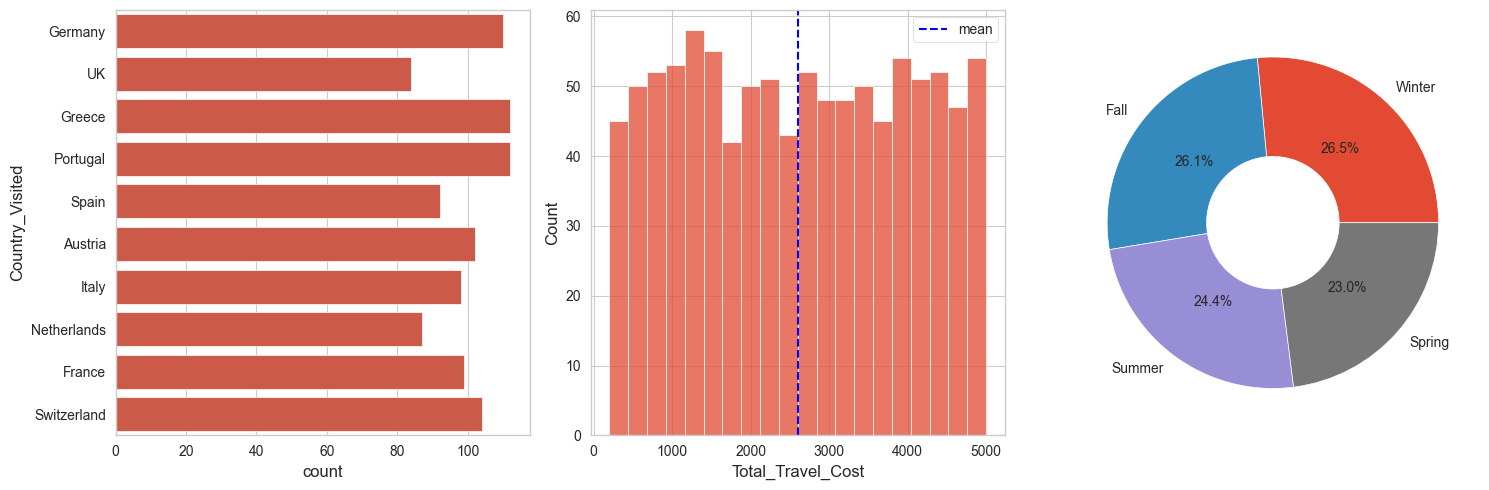

In [206]:
fig , ax = plt.subplots(1,3, figsize = (15,5))

ax[0] = sns.countplot(df["Country_Visited"], ax = ax[0])

ax[1] = sns.histplot(df["Total_Travel_Cost"] , bins = 20, ax = ax[1])
ax[1].axvline( df["Total_Travel_Cost"].mean(), color = "blue", linestyle = "--")
ax[1].legend(["mean"])

ax[2] = plt.pie( x = df["Season_of_Visit"].value_counts(), labels = df["Season_of_Visit"].value_counts().keys() , autopct = "%1.1f%%")
cc = plt.Circle((0,0), radius = 0.4 , fc = "White")
fig = plt.gcf()
fig.gca().add_artist(cc)

plt.tight_layout()
plt.show()

In [36]:
ct = df.groupby("Country_Visited")["Total_Travel_Cost"].sum().reset_index()
ct

,Country_Visited,Total_Travel_Cost
0,Austria,259133
1,France,272650
2,Germany,271320
3,Greece,272255
4,Italy,259782
5,Netherlands,232109
6,Portugal,282556
7,Spain,253444
8,Switzerland,268212
9,UK,228915


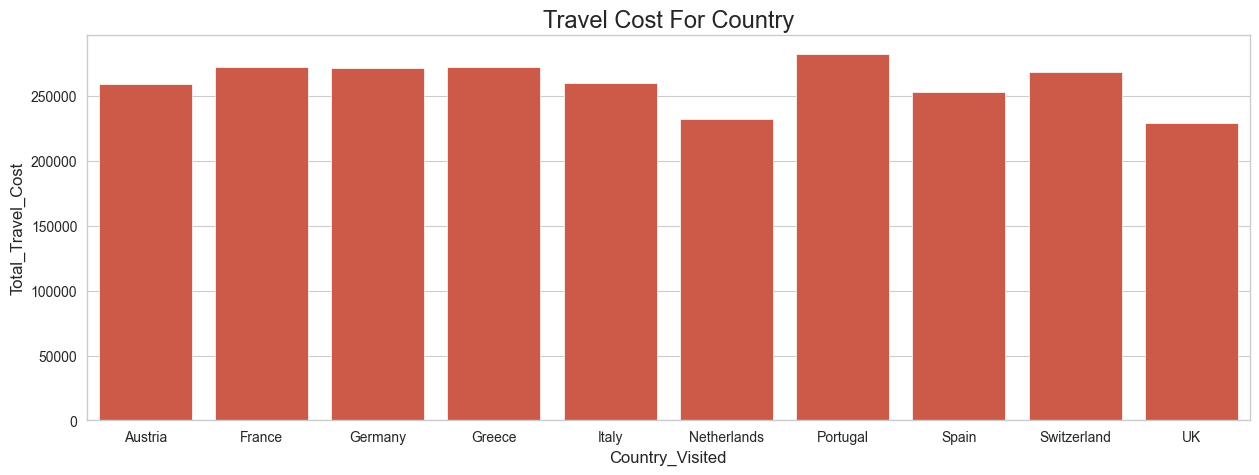

In [45]:
plt.figure( figsize = (15,5))

sns.barplot( ct, x = "Country_Visited", y = "Total_Travel_Cost")
plt.title( "Travel Cost For Country", size = 17)

plt.show()

In [47]:
ms = df.groupby(["Main_Purpose", "Season_of_Visit"]).size().reset_index(name = "Count")
ms

,Main_Purpose,Season_of_Visit,Count
0,Business,Fall,89
1,Business,Spring,76
2,Business,Summer,95
3,Business,Winter,81
4,Family Visit,Fall,86
5,Family Visit,Spring,78
6,Family Visit,Summer,77
7,Family Visit,Winter,105
8,Leisure,Fall,86
9,Leisure,Spring,76


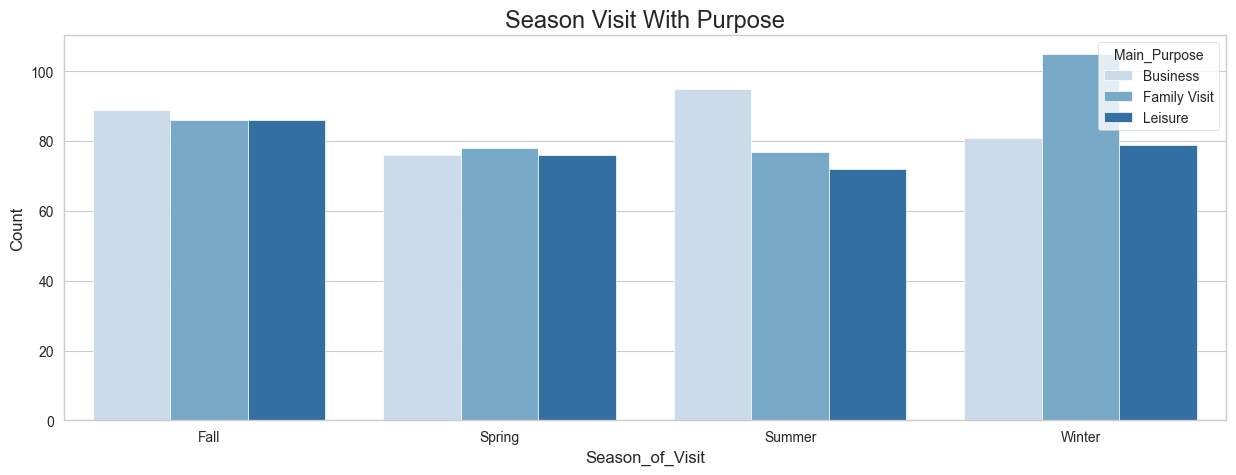

In [54]:
plt.figure( figsize = (15,5))

sns.barplot( ms, x = "Season_of_Visit", y = "Count", hue = "Main_Purpose", palette = "Blues")

plt.title( "Season Visit With Purpose", size = 17)
plt.show()

In [66]:
c_td = df.groupby("Country_Visited")["Travel_Duration_Days"].mean().reset_index()
c_td

,Country_Visited,Travel_Duration_Days
0,Austria,11.588235
1,France,10.848485
2,Germany,10.272727
3,Greece,10.437500
4,Italy,10.438776
5,Netherlands,10.908046
6,Portugal,11.410714
7,Spain,11.108696
8,Switzerland,10.317308
9,UK,10.952381


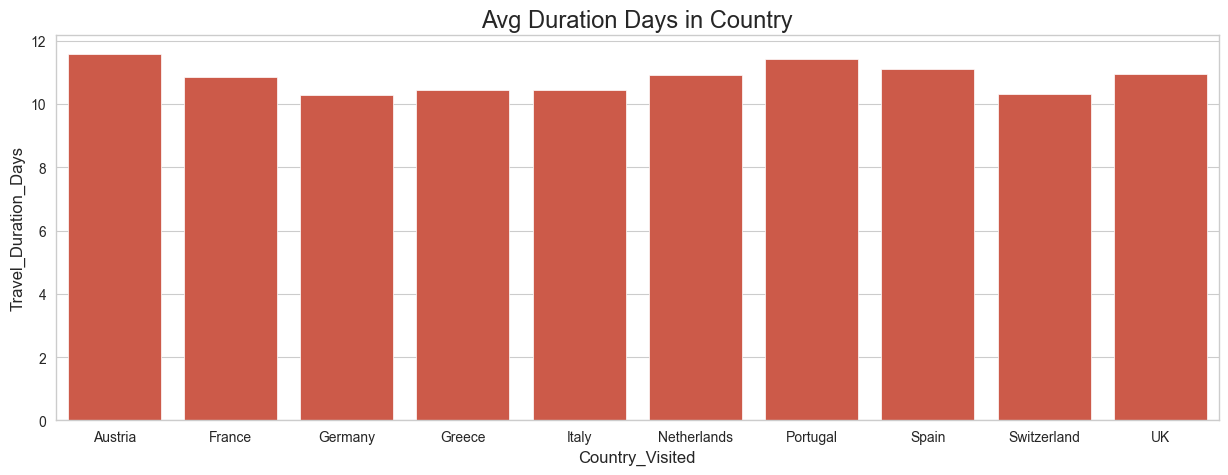

In [69]:
plt.figure( figsize = (15,5))

sns.barplot( c_td, x = "Country_Visited", y = "Travel_Duration_Days")

plt.title( "Avg Duration Days in Country", size = 17)
plt.show()

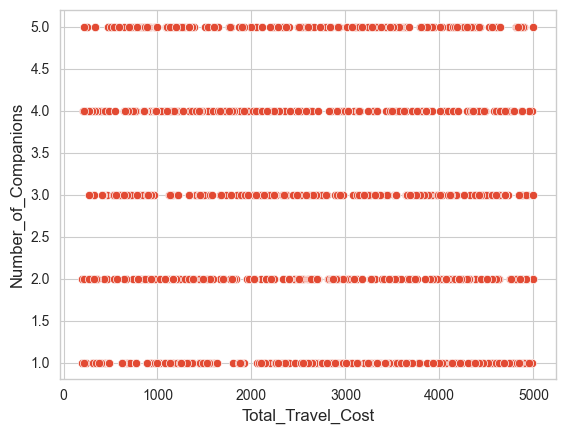

In [75]:
sns.scatterplot(df, y = 'Number_of_Companions', x = 'Total_Travel_Cost')
plt.show()

In [105]:
cv_mt = df.groupby(['Country_Visited', "Mode_of_Travel"]).size().reset_index(name = "count")
cv_mt.head()

,Country_Visited,Mode_of_Travel,count
0,Austria,Bicycle,24
1,Austria,Bus,21
2,Austria,Car,15
3,Austria,Flight,22
4,Austria,Train,20


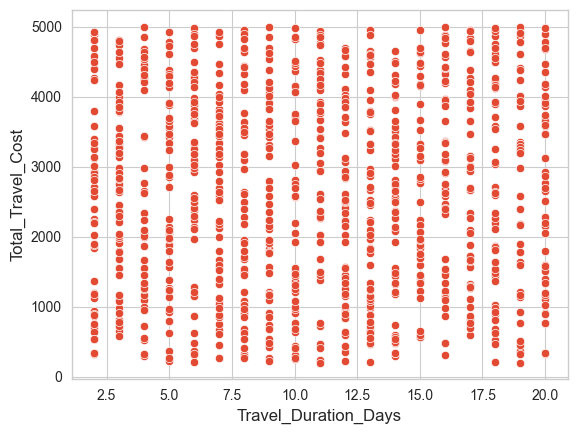

In [209]:
sns.scatterplot(df, x = "Travel_Duration_Days", y = "Total_Travel_Cost")
plt.show()

In [207]:
ca = df.groupby(["Country_Visited","Accommodation_Type"]).size().reset_index(name = "count")
ca.head()

,Country_Visited,Accommodation_Type,count
0,Austria,Airbnb,22
1,Austria,Camping,26
2,Austria,Hostel,20
3,Austria,Hotel,34
4,France,Airbnb,20


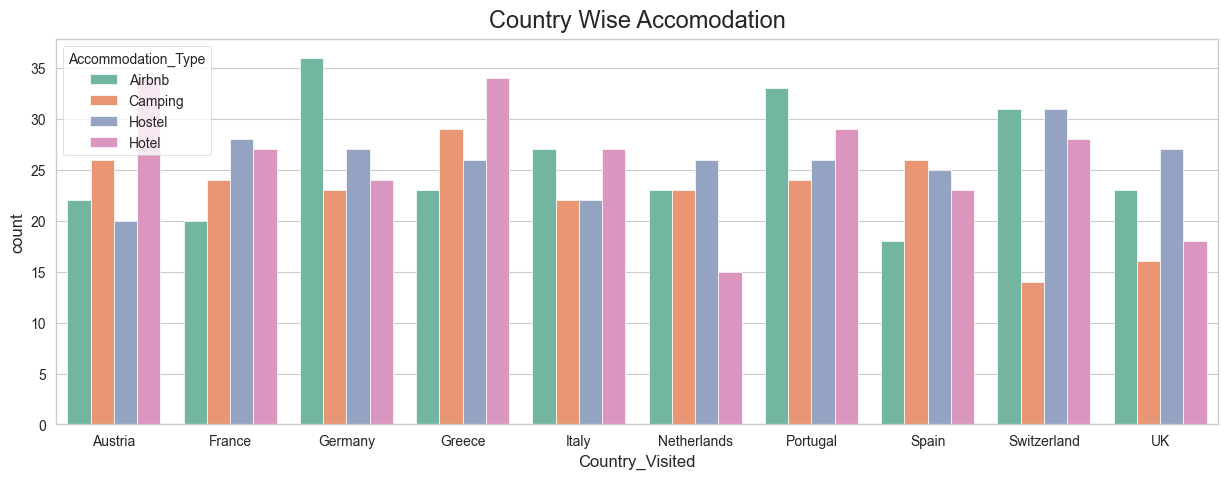

In [208]:
plt.figure( figsize = (15,5))
sns.barplot( ca ,x = "Country_Visited", y = "count", hue = "Accommodation_Type", palette = "Set2")

plt.title("Country Wise Accomodation", size = 17, y = 1.01)
plt.show()

In [135]:
ct.head(3)

,Country_Visited,Total_Travel_Cost
0,Austria,259133
1,France,272650
2,Germany,271320


In [140]:
cv_td = df.groupby(["Country_Visited"])["Travel_Duration_Days"].mean().reset_index()
cv_td.head(3)

,Country_Visited,Travel_Duration_Days
0,Austria,11.588235
1,France,10.848485
2,Germany,10.272727


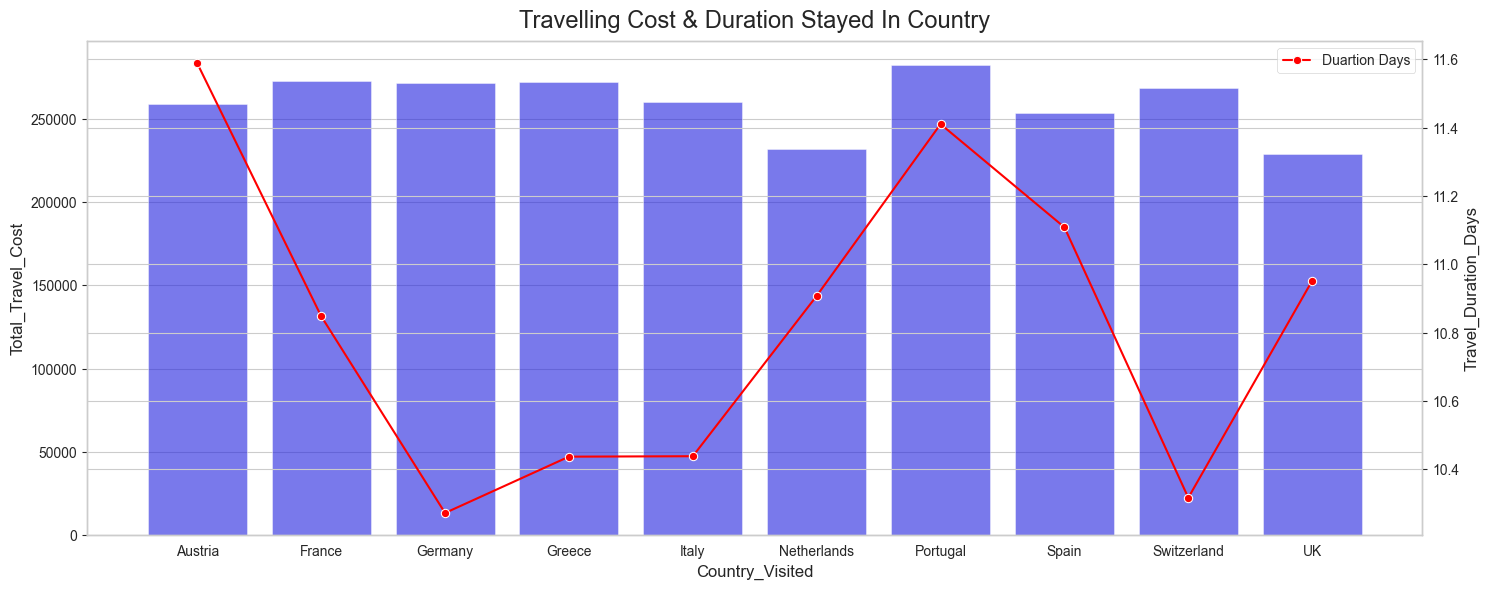

In [230]:
fig , ax1 = plt.subplots( figsize = (15,6))

ax1 = sns.barplot(ct, x = "Country_Visited", y = "Total_Travel_Cost" , color = "blue", alpha = 0.6)

ax2 = ax1.twinx()

ax2 = sns.lineplot( cv_td, x = "Country_Visited", y = "Travel_Duration_Days" , marker = "o", color = "red")

ax2.legend(["Duartion Days"])

plt.title("Travelling Cost & Duration Stayed In Country", size = 17, y = 1.01)
plt.tight_layout()
plt.show()

In [233]:
aus = df[df["Country_Visited"].str.contains("Aus")]
aus


,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit
13,14,Austria,Salzburg,Bus,15,2,2241,Camping,Business,Summer
35,36,Austria,Vienna,Flight,9,3,1770,Hostel,Leisure,Summer
37,38,Austria,Innsbruck,Car,2,5,702,Airbnb,Business,Summer
38,39,Austria,Innsbruck,Bicycle,15,3,4688,Hotel,Family Visit,Winter
43,44,Austria,Salzburg,Bicycle,14,3,3514,Airbnb,Leisure,Winter
...,...,...,...,...,...,...,...,...,...,...
974,975,Austria,Salzburg,Train,20,3,1577,Hostel,Family Visit,Fall
991,992,Austria,Innsbruck,Bus,13,4,4877,Camping,Family Visit,Winter
993,994,Austria,Salzburg,Bicycle,16,3,4999,Hotel,Business,Fall
997,998,Austria,Vienna,Car,16,4,1102,Hotel,Leisure,Fall


In [284]:
x = aus[["Accommodation_Type","Main_Purpose","Season_of_Visit","Total_Travel_Cost"]]

In [285]:
x.head(3)

,Accommodation_Type,Main_Purpose,Season_of_Visit,Total_Travel_Cost
13,Camping,Business,Summer,2241
35,Hostel,Leisure,Summer,1770
37,Airbnb,Business,Summer,702


In [286]:
le = LabelEncoder()

x = x.apply(lambda col : le.fit_transform(col) if col.dtype == "object" else col)

In [287]:
x.head(3)

,Accommodation_Type,Main_Purpose,Season_of_Visit,Total_Travel_Cost
13,1,0,2,2241
35,2,2,2,1770
37,0,0,2,702


In [289]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings as w
w.filterwarnings("ignore")

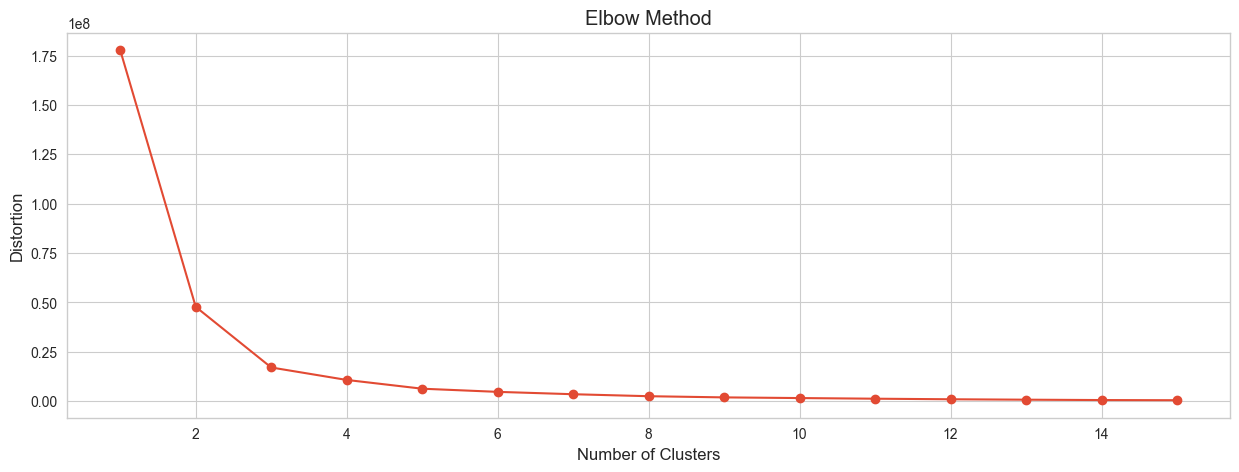

In [290]:
from sklearn.cluster import KMeans

plt.figure( figsize = (15,5))

# Elbow Method
distortions = []
for k in range(1, 16):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


In [296]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
x['Cluster'] = kmeans.fit_predict(x)

In [297]:
x["Cluster"].value_counts()

Cluster
1    36
2    34
0    32
Name: count, dtype: int64

<Axes: >

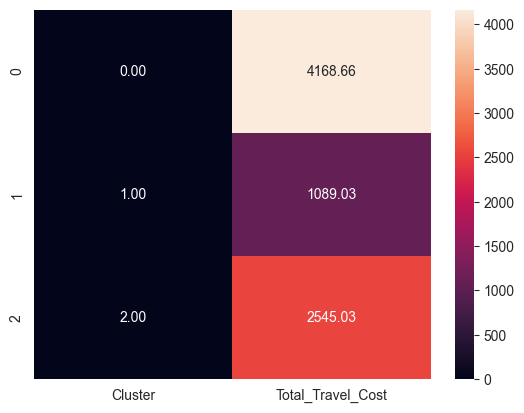

In [304]:
sns.heatmap( x.groupby("Cluster")["Total_Travel_Cost"].mean().reset_index() , annot = True , fmt = "1.2f")